# Zadanie
### Autor: Michał Karp
Bracie, wytrenuj sobie segmentację na dostarczonym datasetcie.

# Ograniczenia

- GPU Colab T4
- max 10 min na gpu (bez pobierania danych)
- rozwiązanie będzie testowanie w środowisku bez dostępu do internetu
- nie możesz trenować na zbiorze walidacyjnym ale możesz go użyć do early stopping i innych tego typu technik

# Ocenianie
Metryką jest Dice coefficient. Wzór na Dice coefficient to:

$$
\text{Dice} = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
$$

Gdzie:

- TP – True Positives (prawidłowo przewidziane piksele obiektu)

- FP – False Positives (piksele tła przewidziane jako obiekt)

- FN – False Negatives (piksele obiektu przewidziane jako tło).

Jeśli Dice cooficent jest poniżej 0.7, otrzymasz 0 punktów. Jeśli powyżej 0.98, otrzymasz 100 punktów. Pomiędzy tymi wartościami wynik rośnie liniowo.

Inne popularne metryki to F1 score, accuracy itp, ale my posłużymy się tą.

# Kod startowy

In [1]:
##### NIE ZMIENIAJ TEJ KOMÓRKI #####

import kagglehub
import os
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

In [2]:
##### NIE ZMIENIAJ TEJ KOMÓRKI #####

path = kagglehub.dataset_download("hngngn/portrait-segmentation-128x128")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/portrait-segmentation-128x128


Train set: 18698 przykładów  •  Val set: 3740 przykładów


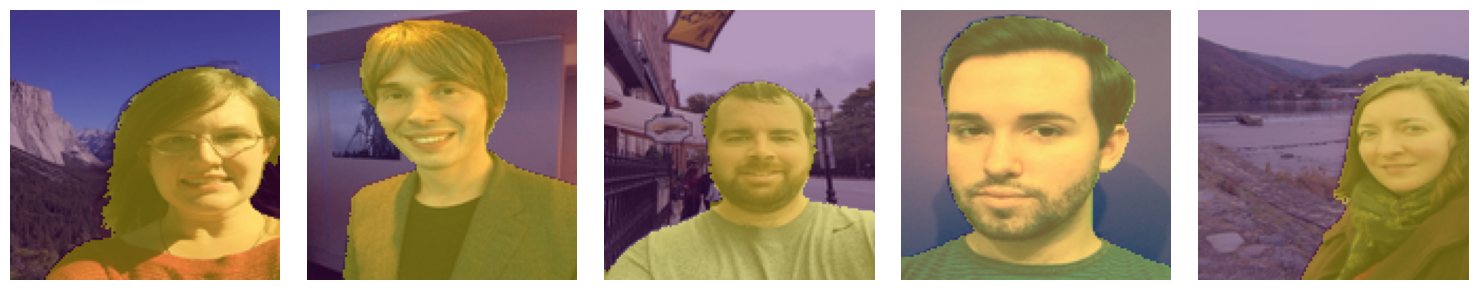

In [3]:
##### NIE ZMIENIAJ TEJ KOMÓRKI (no ok możesz dostosować batch size) #####

BASE_DIR = Path(path)

TRAIN_IMG_DIR = BASE_DIR / "xtrain"
TRAIN_MSK_DIR = BASE_DIR / "ytrain"

VAL_IMG_DIR = BASE_DIR / "xtest"
VAL_MSK_DIR = BASE_DIR / "ytest"

to_tensor = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

mask_to_tensor = transforms.Compose([
    transforms.Resize((128, 128), interpolation=transforms.InterpolationMode.NEAREST_EXACT),
    transforms.ToTensor(),
])

class PortraitSegDataset(Dataset):
    def __init__(self, img_dir, msk_dir, img_transform=None, msk_transform=None):
        self.img_dir = Path(img_dir)
        self.msk_dir = Path(msk_dir)
        self.img_transform = img_transform
        self.msk_transform = msk_transform

        self.names = sorted({p.name for p in self.img_dir.iterdir() if p.suffix.lower() == ".png"})

    def __len__(self):
        return len(self.names)

    def __getitem__(self, idx):
        name = self.names[idx]
        img = Image.open(self.img_dir / name).convert("RGB")
        msk = Image.open(self.msk_dir / name).convert("L")

        if self.img_transform:
            img = self.img_transform(img)

        if self.msk_transform:
            msk = self.msk_transform(msk)

        return img, msk

train_ds = PortraitSegDataset(TRAIN_IMG_DIR, TRAIN_MSK_DIR, img_transform=to_tensor, msk_transform=mask_to_tensor)
val_ds = PortraitSegDataset(VAL_IMG_DIR, VAL_MSK_DIR, img_transform=to_tensor, msk_transform=mask_to_tensor)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

print(f"Train set: {len(train_ds)} przykładów  •  Val set: {len(val_ds)} przykładów")

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    img, msk = train_ds[i]
    ax = axes[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.imshow(msk.squeeze(), alpha=0.4)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Rozwiązanie
W tej sekcji wytrenuj model i umieść rozwiązanie.

Epoch 1/1; Step 10/584; Train loss: 0.31621803641319274
Epoch 1/1; Step 20/584; Train loss: 0.16357504278421403
Epoch 1/1; Step 30/584; Train loss: 0.13812133967876433
Epoch 1/1; Step 40/584; Train loss: 0.11927067637443542
Epoch 1/1; Step 50/584; Train loss: 0.1223152756690979


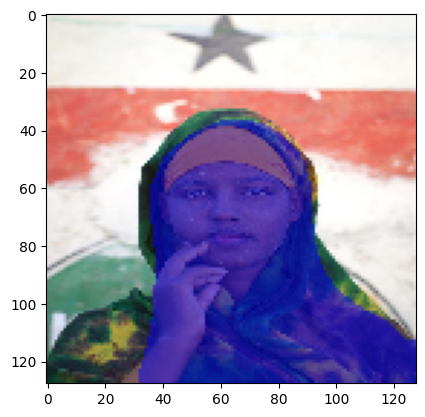

Epoch 1/1; Step 60/584; Train loss: 0.1102814607322216
Epoch 1/1; Step 70/584; Train loss: 0.10190622359514237
Epoch 1/1; Step 80/584; Train loss: 0.10016890615224838
Epoch 1/1; Step 90/584; Train loss: 0.09513299390673638
Epoch 1/1; Step 100/584; Train loss: 0.09056859165430069


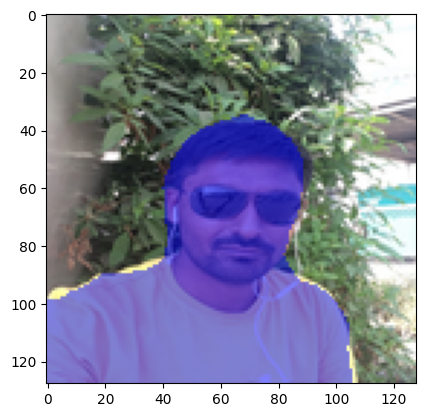

Epoch 1/1; Step 110/584; Train loss: 0.08909176290035248
Epoch 1/1; Step 120/584; Train loss: 0.08195117563009262
Epoch 1/1; Step 130/584; Train loss: 0.08283477574586869
Epoch 1/1; Step 140/584; Train loss: 0.08546158969402314
Epoch 1/1; Step 150/584; Train loss: 0.07950332090258598


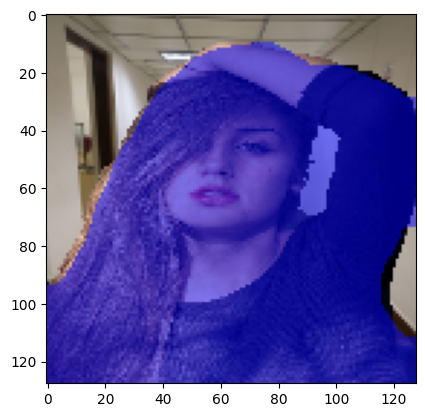

Epoch 1/1; Step 160/584; Train loss: 0.07615815997123718
Epoch 1/1; Step 170/584; Train loss: 0.07588947266340255
Epoch 1/1; Step 180/584; Train loss: 0.07403965443372726
Epoch 1/1; Step 190/584; Train loss: 0.06982615888118744
Epoch 1/1; Step 200/584; Train loss: 0.07238031849265099


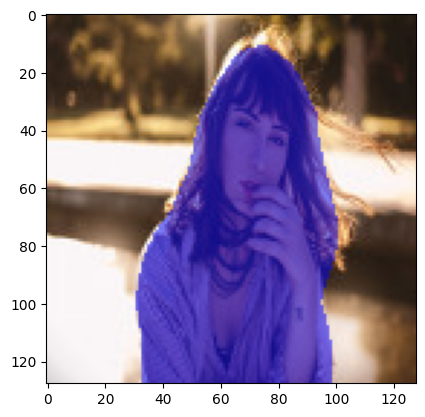

Epoch 1/1; Step 210/584; Train loss: 0.07067836709320545
Epoch 1/1; Step 220/584; Train loss: 0.06903673186898232
Epoch 1/1; Step 230/584; Train loss: 0.07552373372018337
Epoch 1/1; Step 240/584; Train loss: 0.07502393871545791
Epoch 1/1; Step 250/584; Train loss: 0.06641699261963367


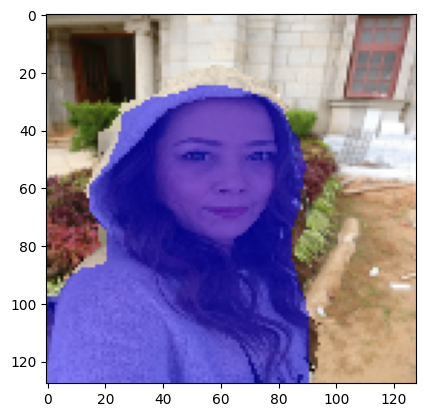

Epoch 1/1; Step 260/584; Train loss: 0.06972890496253967
Epoch 1/1; Step 270/584; Train loss: 0.08462013304233551
Epoch 1/1; Step 280/584; Train loss: 0.07982824929058552
Epoch 1/1; Step 290/584; Train loss: 0.07057826928794383
Epoch 1/1; Step 300/584; Train loss: 0.07013114541769028


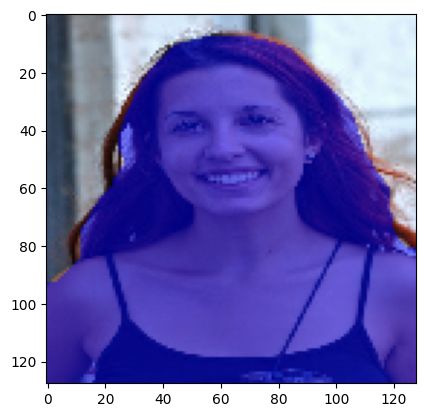

Epoch 1/1; Step 310/584; Train loss: 0.06710000522434711
Epoch 1/1; Step 320/584; Train loss: 0.06281082667410373
Epoch 1/1; Step 330/584; Train loss: 0.06425101198256016
Epoch 1/1; Step 340/584; Train loss: 0.06050594262778759
Epoch 1/1; Step 350/584; Train loss: 0.05973323620855808


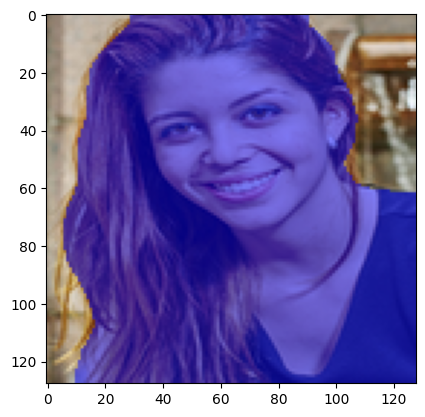

Epoch 1/1; Step 360/584; Train loss: 0.06226597540080547
Epoch 1/1; Step 370/584; Train loss: 0.05934193357825279
Epoch 1/1; Step 380/584; Train loss: 0.05717978328466415
Epoch 1/1; Step 390/584; Train loss: 0.06349215395748616
Epoch 1/1; Step 400/584; Train loss: 0.061560947075486185


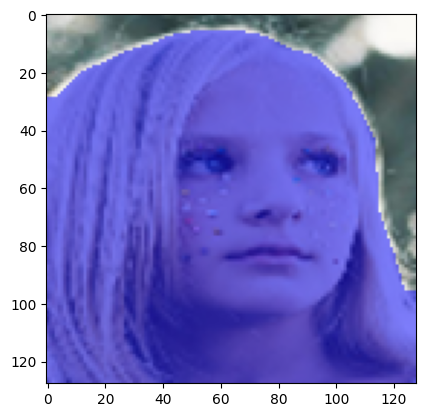

Epoch 1/1; Step 410/584; Train loss: 0.06340265460312366
Epoch 1/1; Step 420/584; Train loss: 0.060828326269984245
Epoch 1/1; Step 430/584; Train loss: 0.07809113524854183
Epoch 1/1; Step 440/584; Train loss: 0.07498447075486184
Epoch 1/1; Step 450/584; Train loss: 0.07694867476820946


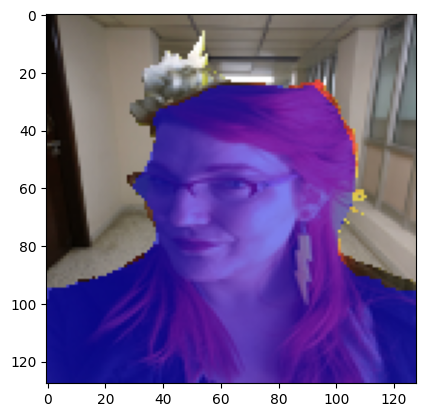

Epoch 1/1; Step 460/584; Train loss: 0.07418710365891457
Epoch 1/1; Step 470/584; Train loss: 0.06999190375208855
Epoch 1/1; Step 480/584; Train loss: 0.07554931342601776
Epoch 1/1; Step 490/584; Train loss: 0.06747581288218499
Epoch 1/1; Step 500/584; Train loss: 0.06073463633656502


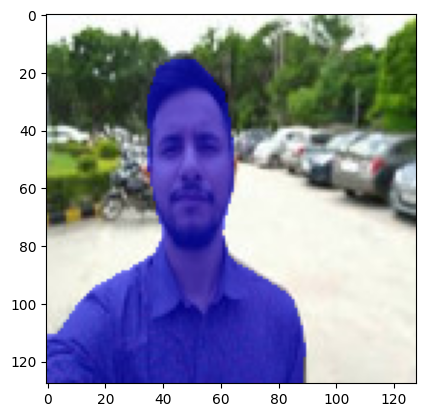

Epoch 1/1; Step 510/584; Train loss: 0.07100509516894818
Epoch 1/1; Step 520/584; Train loss: 0.07224437706172467
Epoch 1/1; Step 530/584; Train loss: 0.06760917715728283
Epoch 1/1; Step 540/584; Train loss: 0.07486048862338066
Epoch 1/1; Step 550/584; Train loss: 0.06169842518866062


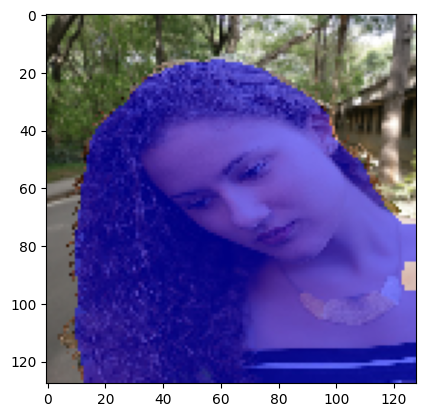

Epoch 1/1; Step 560/584; Train loss: 0.06394330970942974
Epoch 1/1; Step 570/584; Train loss: 0.0673785001039505
Epoch 1/1; Step 580/584; Train loss: 0.08827108629047871


In [4]:
from torchvision.models.segmentation import deeplabv3_resnet50
from statistics import mean

model = deeplabv3_resnet50(weights=None)
model.classifier[4] = torch.nn.Conv2d(256, 1, kernel_size=1)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.functional.binary_cross_entropy_with_logits

NUM_EPOCHS = 1
N_LOG_STEPS = 10
N_SHOW_STEPS = 50

for epoch in range(NUM_EPOCHS):
  losses = []
  for step, batch in enumerate(train_loader):
    optimizer.zero_grad()
    X, y = batch[0].cuda(), batch[1].cuda()

    out = model(X)["out"]

    # Tu można dodać ważenie ale tu nie trzeba bo to dość proste zadanie
    loss = criterion(out.view(-1, 128*128), y.view(-1, 128*128))

    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (step+1)%N_LOG_STEPS == 0:
      print(f"Epoch {epoch + 1}/{NUM_EPOCHS}; Step {step + 1}/{len(train_loader)}; Train loss: {mean(losses)}")
      losses = []

    if (step+1)%N_SHOW_STEPS == 0:
      t = torchvision.utils.draw_segmentation_masks(
          X[0].cpu(),
          (out[0].clone().detach() > 0.5).cpu(),
          colors="#0000ff",
          alpha=0.5
      )

      plt.imshow(t.permute(1, 2, 0))
      plt.show()


In [5]:
@torch.no_grad()
def segment_image(valid_dataset: list):
  masks = []
  dl = DataLoader(valid_dataset, batch_size=128, shuffle=False)
  model.eval()

  for X in dl:
    out = model(X.cuda())["out"]
    masks.append((out > 0.5).cpu())

  # return [torch.zeros((1, 128, 128), dtype=torch.bool) for _ in range(len(valid_dataset))]
  return torch.cat(masks, dim=0)

# Wynik

In [6]:
def dice_coefficient(targets, predictions):
    dice_scores = []
    for target, pred in zip(targets, predictions):
        intersection = (target & pred).sum().float()
        union = target.sum().float() + pred.sum().float()
        dice = (2. * intersection) / (union + 1e-8)
        dice_scores.append(dice)

    return torch.mean(torch.stack(dice_scores)).item()

In [ ]:
def scale_dice(dice):
    if dice < 0.7:
        return 0.0
    elif dice > 0.98:
        return 100.0
    else:
        return 100 * (dice - 0.7) / (0.98 - 0.7)

In [8]:
result = dice_coefficient(
    list(map(lambda X: X[1].bool(), val_ds)),
    segment_image(list(map(lambda X: X[0], val_ds)))
)

print(f"Dice cooficent:", result)
print(f"Score:", scale_dice(result))

Dice cooficent: 0.9820178151130676
Score: 1.0
